In [ ]:
import json

with open('intents.json', 'r') as f:
  intents = json.load(f)

intents['intents']

[{'tag': 'greeting',
  'patterns': ['Hi',
   'Hey',
   'Is anyone there?',
   'Hi there',
   'Hello',
   'Hey there',
   'Howdy',
   'Hola',
   'Bonjour',
   'Konnichiwa',
   'Guten tag',
   'Ola'],
  'responses': ['Hello there. Tell me how are you feeling today?',
   'Hi there. What brings you here today?',
   'Hi there. How are you feeling today?',
   'Great to see you. How do you feel currently?',
   "Hello there. Glad to see you're back. What's going on in your world right now?"]},
 {'tag': 'morning',
  'patterns': ['Good morning'],
  'responses': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "]},
 {'tag': 'afternoon',
  'patterns': ['Good afternoon'],
  'responses': ['Good afternoon. How is your day going?']},
 {'tag': 'evening',
  'patterns': ['Good evening'],
  'responses': ['Good evening. How has your day been?']},
 {'tag': 'night',
  'patterns': ['Good night'],
  'responses': ['Good night. Get some proper sleep',
   'Good night. Sweet dreams.'

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import json
import random
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from fuzzywuzzy import process
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def load_intents(file_path):
    with open('intents.json', 'r') as file:
        intents_data = json.load(file)
    return intents_data.get('intents', [])

In [ ]:
def get_tag(user_input, intents):
    user_input_lower = user_input.lower()

    matched_pattern = fuzzy_match(user_input_lower, intents)

    if matched_pattern:

        for intent in intents:
            if matched_pattern in intent['patterns']:
                return intent['tag']

    return "no-response"

In [ ]:
def get_response(tag, intents):
    for intent in intents:
        if intent['tag'] == tag:
            responses = intent.get('responses', [])
            return random.choice(responses)

In [ ]:
def perform_sentiment_analysis(user_input):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(user_input)
    return sentiment_scores

In [ ]:
# Fuzzy matching function
def fuzzy_match(user_input, intents):
    patterns_list = [pattern for intent in intents for pattern in intent['patterns']]
    matched_pattern, similarity_score = process.extractOne(user_input, patterns_list)
    return matched_pattern

In [ ]:
# Accumulate sentiment scores
total_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}

history_neg = []
history_neu = []
history_pos = []
history_compound = []

In [ ]:
file_path = 'intents.json'
intents = load_intents(file_path)

count = 0

while True:
    user_input = input("User: ")

    if user_input.lower() == 'exit':
        break

    sentiment_scores = perform_sentiment_analysis(user_input)

    for key, value in sentiment_scores.items():
        total_sentiment_scores[key] += value

    history_neg.append(total_sentiment_scores['neg'])
    history_neu.append(total_sentiment_scores['neu'])
    history_pos.append(total_sentiment_scores['pos'])
    history_compound.append(total_sentiment_scores['compound'])

    print(f"Sentiment Analysis Scores for Input {count + 1}: {sentiment_scores}")

    tag = get_tag(user_input, intents)

    response = get_response(tag, intents)

    print(f"ChatBot: {response}")

    count += 1

Sentiment Analysis Scores for Input 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ChatBot: Hello there. Glad to see you're back. What's going on in your world right now?
Sentiment Analysis Scores for Input 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ChatBot: You can call me Pandora.
Sentiment Analysis Scores for Input 3: {'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'compound': -0.25}
ChatBot: Don't be hard on yourself. What's the reason behind this?


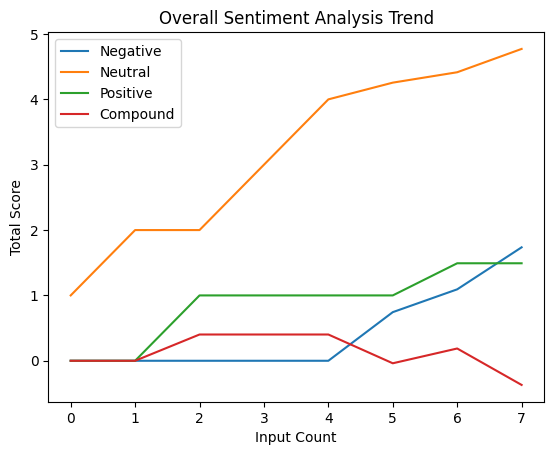

In [ ]:
# Plot the final sentiment analysis line chart
import matplotlib.pyplot as plt

plt.plot(history_neg, label='Negative')
plt.plot(history_neu, label='Neutral')
plt.plot(history_pos, label='Positive')
plt.plot(history_compound, label='Compound')

plt.title('Overall Sentiment Analysis Trend')
plt.xlabel('Input Count')
plt.ylabel('Total Score')
plt.legend()
plt.show()
